### Part 1 - Encodings

Navigate to [datavizproject](https://datavizproject.com/) and take some time to freely browse the website and explore. After browsing, find a visual encoding on the webpage that is new to you (i.e. one you have never seen before).

##### Quesiton 1 (5 pts)
Put in this section a screenshot and hyperlink to the visual encoding that is new to you.

![CHORD](chord_diagram.png)

https://datavizproject.com/data-type/chord-diagram/

##### Question 2 (5 pts)

Add a short paragraph explaining what you like and do not like about the new-to-you visual encoding you selected.

I like how all the information is contained within a single circle, but I do not like how busy and cluttered the center of the circle is. I do not like how similar the colors used in the website's picture are, though I'm sure they can be changed in any work of my own. I also like how the portions of the circle given to each letter are not the same, so in addition to connections, this diagram can also dsplay information about the size or some other attribute of the data.

Take a look at the toolbar at the top of the webpage. Note how visualizations are organized (categorized) in multiple ways to help the user identify a visual encoding depending on whether they care about data type, composition, or task.

##### Question 3 (5 pts)

What does “Input” mean? How are the visualizations categorized in this scheme? How does (if at all) this map to the language in our readings?

Input means the way that the data is shaped, or how it is organized. Visualizations are categorized by the same input if any data organization or data structure that can be used to create one visualization in the category can also be used to create any other visualization in the category. This doesn't really map to the language of marks and channels, since input relates only to the data itself, not the visualization

##### Question 4 (5 pts)

What does “Shape” mean? How are the visualizations categorized in this scheme? How does (if at all) this map to the language in our readings?

Shape means the overall way the visualization is shaped. Other visualizations are in the same scheme if they look similar from a distance, ignoring the intricacies of what makes them different from the other visualizations in the category. This loosely maps to the concept of channels, as visualizations with similar shapes will have similar channels.

##### Question 5 (5 pts)

What does “Function” mean? How are the visualizations categorized in this scheme? How does (if at all) this map to the language in our readings?

Function means the type of analysis that the visualizations are trying to facilitate. Other visualizations are in the same function scheme if they are helpful at answering the same questions as other visualizations in the scheme. This doesn't really map to the language of marks and channels, since function relates to the questions and analysis about the data, not so much the visualization.

### Part 2 - Xenographics (15 pts)

Watch the following talk about the Xenographics project by Maarten Lambrechts from the OpenVis Conf (2018): [https://www.youtube.com/watch?v=fp-WNqaQG0s](https://www.youtube.com/watch?v=fp-WNqaQG0s)

Next, explore the online collection: https://xeno.graphics/.

Then, write a 1-2 paragraph response (minimum 200 words) which addresses the following questions:

- What is the Xenographics project, and what is its goal?
- How are the visualizations categorized and organized on the project website?
- What was the most interesting or surprising thing you learned by watching the talk and exploring the website?
- Provide a link and short description to your favorite visualization on the website.

Your 1–2 paragraphs evidence a critical and thoughtful effort and answer the posed questions. Your writing shows a high degree of attention to logic and reasoning of points, is written in a clear manner, and words are chosen to precisely express the intended meaning and support reader comprehension. There are few English spelling or grammar mistakes.	 

The Xenographics project is a collection of graphs and figures designed to introduce new ways of visualizing data which are more in line with the types of data being produced in the modern era. The motivation for this project came from the idea that well-known data visualization graphs are becoming outdated and need to be refreshed and enhanced. The visualizations are categorized by how they build upon existing and well-understood visualizations, such as mashing them up or adding higher dimensions to the visualization. The most interesting thing I learned from watching the talk was how recent well-known visual tools like line plots and bar plots are, and how they were initially treated with disdain, which is surprising to me since all of those visualizations are incredibly commonplace now and taught to children at a very young age.

One of my favorite visualizations on the website is the swing map (https://xeno.graphics/swing-graphs/), which shows the political swing of voters by income throughout election cycles since 2004. This visualization does a very good job at demonstrating how political attitudes have shifted over time, and shows clear political turns in each group at points between 2004 and 2016, but because of the minimal labeling of the figure, it's hard to know when these interesting turns occurred.

### Part 3 - Basic data analysis with Python

Here is a dataset of Seattle weather in 4 years. Load the data and generate corresponding data visualizations. Make sure each figure has title, labels and legends if necessary. Add one or two sentences in each figure to talk about what you have learned from the figure. 

In [1]:
from vega_datasets import data

weather = data.seattle_weather()
weather.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


##### Question 1 (5 pts)

Generate a data visualization to show the relationship between precipitation and max temperature.  

Text(0.5, 1.0, 'Seattle Precipitation vs Maximum Temperature')

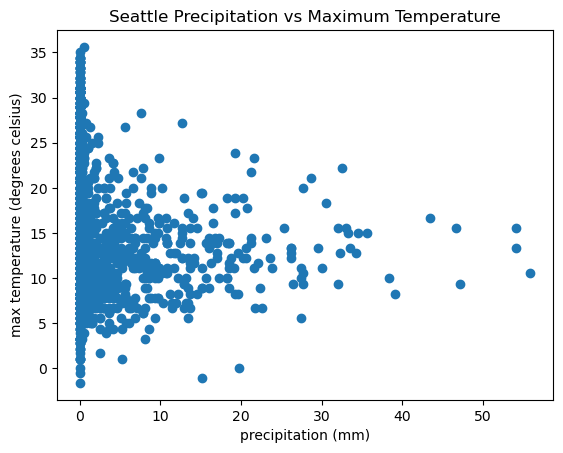

In [2]:
from matplotlib import pyplot as plt

plt.scatter(weather['precipitation'],weather['temp_max'])
plt.xlabel('precipitation (mm)')
plt.ylabel('max temperature (degrees celsius)')
plt.title('Seattle Precipitation vs Maximum Temperature')

This figure shows that there are very many data points with 0 mm of precipitation, which range the entire spectrum of maximum temperature, so if there is no precipitation, this information does not help predict maximum temperature. The graph is roughly triangular, suggesting that as precipitation increases, the user can more confidently predict what the maximum temperature will be - as precipitation rises above 40 mm, it seems safe to assume that the maximum temperature will be between 5 and 20 degrees celsius.

##### Question 2 (5 pts)

Generate a data visualization to show the relationship between max temperature and weather type.  

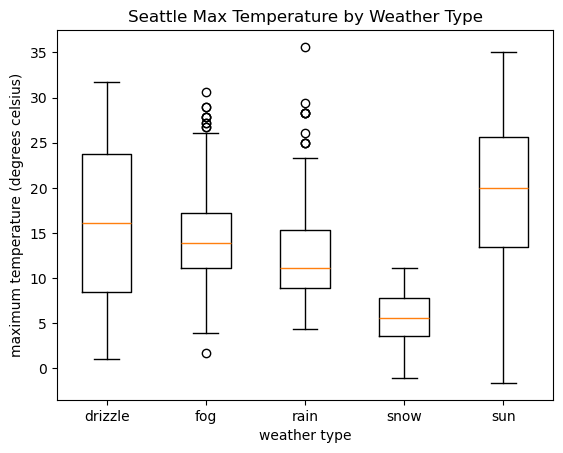

In [29]:
drizzle = weather[weather['weather']=='drizzle']['temp_max']
fog = weather[weather['weather']=='fog']['temp_max']
rain = weather[weather['weather']=='rain']['temp_max']
snow = weather[weather['weather']=='snow']['temp_max']
sun = weather[weather['weather']=='sun']['temp_max']

plt.boxplot([drizzle,fog,rain,snow,sun],labels=['drizzle','fog','rain','snow','sun'])
plt.xlabel('weather type')
plt.ylabel('maximum temperature (degrees celsius)')
plt.title('Seattle Max Temperature by Weather Type')
plt.show()

This figure shows that during sunny weather the entire range of maximum temperature values are covered, suggesting that if the weather is sunny, there is no inference that can be made about the maximum temperature. For other weather types, most notably snowy, the median max temperature and range of max temperatures are much lower, so for snowy weather more than any other type, one can be reasonably sure about what the max temperature will be.

##### Question 3 (5 pts)

Generate a data visualization to show the relationship between max temperature and min temperature, and then show different color for differnet weather type. 

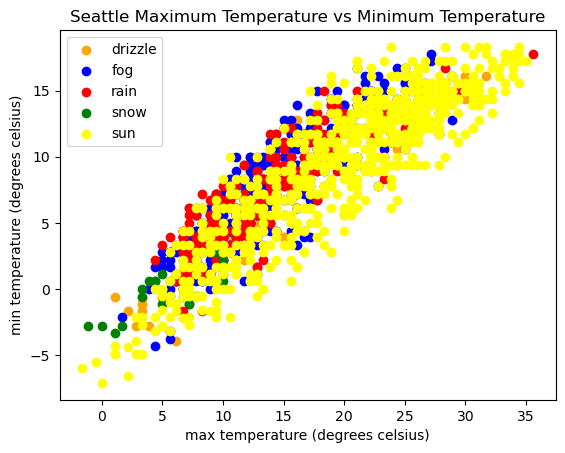

In [32]:
drizzle = weather[weather['weather']=='drizzle']
fog = weather[weather['weather']=='fog']
rain = weather[weather['weather']=='rain']
snow = weather[weather['weather']=='snow']
sun = weather[weather['weather']=='sun']

plt.scatter(drizzle['temp_max'],drizzle['temp_min'], color='orange')
plt.scatter(fog['temp_max'],fog['temp_min'], color='blue')
plt.scatter(rain['temp_max'],rain['temp_min'], color='red')
plt.scatter(snow['temp_max'],snow['temp_min'], color='green')
plt.scatter(sun['temp_max'],sun['temp_min'], color='yellow')
plt.xlabel('max temperature (degrees celsius)')
plt.ylabel('min temperature (degrees celsius)')
plt.title('Seattle Maximum Temperature vs Minimum Temperature')
plt.legend(['drizzle','fog','rain','snow','sun'])

This figure shows that for all five weather types, there is a linear correlation between maximum temperature and minimum temperature. From this graph, there's no clear difference between each of the five weather types, but a different visualization might provide more insight.

##### Question 4 (5 pts) 

Generate a data visualization to show the relationship between max temperature, min temperature and wind speed. 

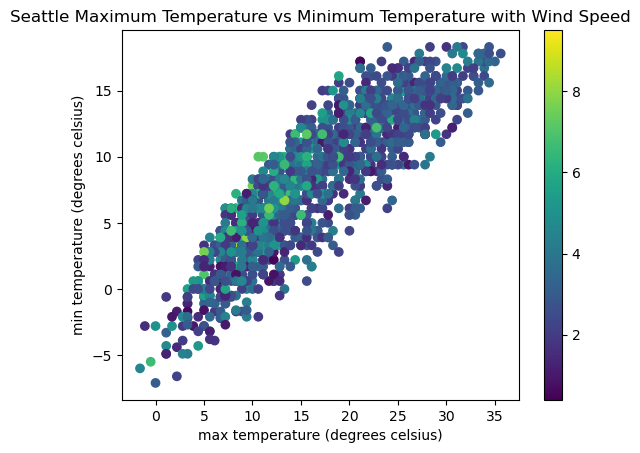

In [17]:
plt.scatter(weather['temp_max'],weather['temp_min'],c=weather['wind'])
plt.xlabel('max temperature (degrees celsius)')
plt.ylabel('min temperature (degrees celsius)')
plt.title('Seattle Maximum Temperature vs Minimum Temperature with Wind Speed')
plt.colorbar()

This visualization shows a strong linear correlation between maximum temperature and minimum temperature. Additionally, the colors which indicate wind speed show some loose clustering around the 10-15 maximum degrees and 5-10 minimum degrees intersection, where the highest wind speeds seem to occur.

### Part 4 - Basic data analysis with Altair

We are going to use the same data but use Altair to create the data visualziation. 

##### Question 1 (5 points)

Recreate the figure in Part 3 Question 2 with Altair. 

In [30]:
import altair as alt

alt.Chart(weather).mark_boxplot().encode(
    alt.X("weather:N"),
    alt.Y("temp_max:Q").scale(zero=False)
).properties(
    title = 'Seattle Max Temperature by Weather Type'
)

alt.Chart(...)

##### Question 2 (5 points)

Recreate the figure in Part 3 Question 3 with Altair.

In [31]:
alt.Chart(weather).mark_circle(size=60).encode(
    x='temp_max',
    y='temp_min',
    color='weather',
    tooltip=['temp_max', 'temp_min', 'weather']
).properties(
    title = 'Seattle Maximum Temperature vs Minimum Temperature'
)

alt.Chart(...)

##### Question 3 (10 points)

Create a facet figure with 2 row and 3 columns. For each panel in the facet figure, it shows a scatter plot between the max and min temperature for one type of weather. Use the wind speed to color the points. Also add interaction to show the max and min temperature and wind speed for each data point. Include necessary title and labels. 

In [41]:
alt.Chart(weather).mark_point().encode(
    x='temp_max:Q',
    y='temp_min:Q',
    color='wind:Q',
    tooltip=['temp_max', 'temp_min', 'wind']
).facet(
    facet='weather:N',
    columns=3
).properties(
    title = 'Seattle Maximum Temperature vs Minimum Temperature with Wind Speed by Weather'
).interactive()

alt.FacetChart(...)

##### Question 4 (10 points)

Create a compound figure with at least two types of marks. Show the trend of average temperature (the average of min and max temperature) in 4 years. Include necessary title and labels.

In [64]:
weather['temp_mean'] = (weather['temp_min'] + weather['temp_max']) / 2

min = alt.Chart().mark_point().encode(
    x='date:T',
    y='temp_min:Q'
).configure_mark(
    color='red'
)

max = alt.Chart().mark_point().encode(
    x='date:T',
    y='temp_max:Q'
).configure_mark(
    color='blue'
)

avg = alt.Chart().mark_line().encode(
    x='date:T',
    y='temp_mean'
).configure_mark(
    color='purple'
)

#I couldn't get them to stack on top of each other